# Telecom Churn Case Study

## Importing the necessary libraries

In [120]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


## Making few changes to ease coding

In [121]:
%matplotlib inline
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

## Loading the data and looking at the different data statistics

In [122]:
churnData = pd.read_csv('telecom_churn_data.csv')

churnData.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [123]:
churnData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [124]:
churnData.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [125]:
churnData.shape

(99999, 226)

In [126]:
# We will retain a copy of the original data.

originalData = churnData.copy()

In [127]:
churnData['date_of_last_rech_9'].isnull().sum()

4760

## Next we will handle missing data

In [128]:
# Here we are creating a function to tell us the percentage of missing data.

def PercNulls(data):
    df = pd.DataFrame(round(100 * data.isnull().sum()/len(data), 2), columns=['Percentage of Nulls'])
    df['Count of Nulls'] = data.isnull().sum()
    df = df[df['Count of Nulls'] > 0]
    df = df.sort_values('Count of Nulls', ascending=False)
    return(df)

In [129]:
PercNulls(churnData)

,Percentage of Nulls,Count of Nulls
count_rech_2g_6,74.85,74846
max_rech_data_6,74.85,74846
arpu_3g_6,74.85,74846
av_rech_amt_data_6,74.85,74846
count_rech_3g_6,74.85,74846
night_pck_user_6,74.85,74846
arpu_2g_6,74.85,74846
fb_user_6,74.85,74846
total_rech_data_6,74.85,74846
date_of_last_rech_data_6,74.85,74846


In [130]:
# We have 166 columns out of 226 having missing data.

len(PercNulls(churnData))

166

In [131]:
# Getting all the date columns from the list of columns having missing data.

missingColumns = list(PercNulls(churnData).index)

matches = [x for x in missingColumns if 'date' in x]
matches

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_9',
 'date_of_last_rech_data_8',
 'date_of_last_rech_9',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7']

In [132]:
# Dropping the date columns with nulls.

churnData = churnData.drop(matches, axis=1)

In [133]:
missingColumns = list(PercNulls(churnData).index)

# Getting all the recharge columns from the list of columns having missing data.

matches = [x for x in missingColumns if 'rech' in x]
matches

['count_rech_2g_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_7',
 'av_rech_amt_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'total_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'count_rech_2g_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'count_rech_3g_8']

In [134]:
# Since these columns are numerical columns which hold information relative to the recharge done, we will replace these columns
# with 0.

churnData[matches] = churnData[matches].fillna(0)

In [135]:
# We find the columns with more than 70 % missing data.

nulls = PercNulls(churnData)
nulls[nulls['Percentage of Nulls'] > 70]

,Percentage of Nulls,Count of Nulls
arpu_2g_6,74.85,74846
fb_user_6,74.85,74846
arpu_3g_6,74.85,74846
night_pck_user_6,74.85,74846
night_pck_user_7,74.43,74428
fb_user_7,74.43,74428
arpu_2g_7,74.43,74428
arpu_3g_7,74.43,74428
arpu_3g_9,74.08,74077
arpu_2g_9,74.08,74077


In [136]:
missing70 = nulls[nulls['Percentage of Nulls'] > 70].index
churnData[missing70].head()

,arpu_2g_6,fb_user_6,arpu_3g_6,night_pck_user_6,night_pck_user_7,fb_user_7,arpu_2g_7,arpu_3g_7,arpu_3g_9,arpu_2g_9,fb_user_9,night_pck_user_9,night_pck_user_8,arpu_2g_8,fb_user_8,arpu_3g_8
0,212.17,1.0,212.17,0.0,0.0,1.0,212.17,212.17,NaN,NaN,NaN,NaN,0.0,212.17,1.0,212.17
1,NaN,NaN,NaN,NaN,0.0,1.0,28.61,0.00,NaN,NaN,NaN,NaN,0.0,7.60,1.0,0.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.84,0.0,1.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# Removing columns with more than 70% missing data.

churnData = churnData.drop(missing70, axis=1)

In [138]:
churnData[PercNulls(churnData).index].head(10)

,ic_others_9,std_og_t2m_mou_9,loc_og_t2m_mou_9,std_ic_t2f_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,og_others_9,loc_og_mou_9,std_ic_t2t_mou_9,std_og_t2t_mou_9,loc_ic_mou_9,loc_og_t2t_mou_9,std_og_t2f_mou_9,loc_ic_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,loc_ic_t2m_mou_9,isd_og_mou_9,loc_ic_t2t_mou_9,spl_og_mou_9,std_ic_t2o_mou_9,std_ic_t2m_mou_9,spl_ic_mou_9,isd_ic_mou_9,roam_ic_mou_9,std_ic_mou_9,roam_og_mou_9,onnet_mou_9,offnet_mou_9,spl_og_mou_8,isd_og_mou_8,loc_ic_t2m_mou_8,onnet_mou_8,std_og_t2m_mou_8,std_og_mou_8,ic_others_8,loc_ic_t2f_mou_8,isd_ic_mou_8,std_og_t2c_mou_8,loc_ic_t2t_mou_8,offnet_mou_8,std_og_t2f_mou_8,loc_ic_mou_8,loc_og_t2t_mou_8,loc_og_t2c_mou_8,std_ic_t2m_mou_8,std_ic_t2o_mou_8,loc_og_t2m_mou_8,std_ic_mou_8,loc_og_t2f_mou_8,roam_og_mou_8,std_ic_t2f_mou_8,std_ic_t2t_mou_8,og_others_8,loc_og_mou_8,roam_ic_mou_8,std_og_t2t_mou_8,spl_ic_mou_8,spl_ic_mou_6,loc_ic_t2f_mou_6,isd_ic_mou_6,std_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2m_mou_6,std_ic_t2o_mou_6,loc_ic_t2m_mou_6,ic_others_6,std_ic_mou_6,loc_ic_t2t_mou_6,std_ic_t2t_mou_6,isd_og_mou_6,std_og_mou_6,loc_og_mou_6,std_og_t2m_mou_6,roam_og_mou_6,std_og_t2f_mou_6,loc_og_t2f_mou_6,std_og_t2c_mou_6,roam_ic_mou_6,std_og_t2t_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,offnet_mou_6,onnet_mou_6,spl_og_mou_6,loc_og_t2c_mou_6,og_others_6,loc_og_t2m_mou_7,loc_og_t2t_mou_7,std_ic_mou_7,og_others_7,spl_ic_mou_7,roam_og_mou_7,roam_ic_mou_7,offnet_mou_7,isd_ic_mou_7,onnet_mou_7,ic_others_7,std_ic_t2o_mou_7,loc_og_t2c_mou_7,loc_og_t2f_mou_7,std_ic_t2f_mou_7,spl_og_mou_7,loc_ic_t2m_mou_7,isd_og_mou_7,std_og_mou_7,loc_ic_t2f_mou_7,std_og_t2c_mou_7,loc_ic_mou_7,std_og_t2f_mou_7,std_og_t2m_mou_7,std_ic_t2t_mou_7,std_og_t2t_mou_7,std_ic_t2m_mou_7,loc_og_mou_7,loc_ic_t2t_mou_7,std_og_t2o_mou,loc_ic_t2o_mou,loc_og_t2o_mou
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,4.13,0.00,0.00,0.00,0.00,1.15,0.00,0.0,0.16,0.00,0.00,5.44,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,0.00,0.00,53.76,0.00,0.00,0.00,0.00,72.11,0.00,0.00,173.03,18.34,0.00,0.00,0.0,0.00,56.93,0.0,116.09,0.00,0.0,15.01,0.00,0.00,0.00,15.01,0.00,18.34,53.76,12.76,0.00,375.58,7.68,0.13,0.13,0.00,3.61,0.00,0.0,29.23,304.76,0.00,408.43,7.68,0.00,12.49,0.0,291.86,14.84,0.00,0.00,0.00,2.35,0.0,299.54,0.00,0.00,0.00,0.00,0.00,1.83,0.00,19.09,5.90,0.0,17.48,0.00,5.90,1.61,0.00,0.0,0.23,35.39,0.00,0.00,0.00,0.00,0.0,0.00,0.23,23.88,11.51,15.74,24.11,4.68,0.00,0.00,75.94,74.56,0.00,0.0,0.00,0.00,0.00,99.84,0.00,78.68,0.00,0.0,2.91,0.00,0.00,23.43,65.38,0.00,4.58,8.93,0.0,104.23,0.00,0.46,0.00,4.11,0.00,150.51,29.91,0.0,0.0,0.0
2,0.36,9.28,28.16,3.86,22.24,0.48,0.00,64.81,49.44,8.76,345.41,14.39,0.00,158.19,0.0,18.04,38.98,0.0,148.23,42.08,0.0,118.18,0.45,0.01,38.49,171.49,70.94,74.81,118.91,96.84,0.00,38.89,37.26,75.53,120.94,0.00,49.63,0.00,0.0,67.46,208.36,22.83,155.99,13.58,45.76,167.09,0.0,38.46,239.03,15.61,0.00,43.23,28.69,0.0,67.66,0.00,22.58,0.00,0.21,99.48,0.00,21.73,229.56,45.18,0.0,14.38,0.93,139.33,115.69,72.41,0.0,47.64,60.66,41.81,0.00,1.48,24.11,0.0,0.00,4.34,7.19,29.34,143.33,11.54,46.56,0.00,0.45,16.86,28.74,306.66,0.0,0.00,0.00,0.00,220.59,0.85,55.24,3.14,0.0,135.54,21.79,58.34,236.84,15.44,0.00,108.68,122.29,0.0,208.86,14.76,67.41,71.29,26.49,177.01,67.41,71.11,0.0,0.0,0.0
3,0.80,9.99,65.46,0.00,2.06,0.00,0.00,83.03,129.84,226.21,160.19,15.49,0.00,65.59,0.0,236.21,52.86,0.0,41.73,43.29,0.0,13.98,0.55,0.00,0.00,143.83,0.00,241.71,113.54,18.09,0.00,20.28,310.98,6.53,296.11,0.00,19.84,0.00,0.0,8.04,71.68,0.00,48.18,10.61,0.00,4.94,0.0,22.46,4.94,4.91,39.04,0.00,0.00,0.0,37.99,44.38,289.58,0.00,0.59,57.43,0.00,1.18,233.48,1.33,0.0,113.96,0.00,45.99,62.08,43.48,0.0,29.23,1

In [139]:
# The following code tells us the columns which have ony 1 unique value and hence show zero variance.

uniqueCount = pd.DataFrame(churnData.nunique(), columns=['Number of unique values'])
uniqueCount[uniqueCount['Number of unique values'] == 1]

,Number of unique values
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
last_date_of_month_6,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1
std_og_t2c_mou_8,1
std_og_t2c_mou_9,1
std_ic_t2o_mou_6,1


In [140]:
# On diving deeper into the data we find that the following columns show 0 variance, hence will be dropped.

noVarianceColumns = list(uniqueCount[uniqueCount['Number of unique values'] == 1].index)

churnData[noVarianceColumns].apply(pd.Series.value_counts)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0.0,NaN,98981.0,98981.0,98981.0,NaN,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0
109.0,99999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/30/2014,NaN,NaN,NaN,NaN,99999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# Dropping zero variance columns.

churnData = churnData.drop(noVarianceColumns, axis=1)

In [142]:
# Remaining columns are all float, we will replace the nulls with mean.

churnData[PercNulls(churnData).index].info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 108 columns):
ic_others_9         float64
std_ic_t2m_mou_9    float64
loc_ic_t2t_mou_9    float64
loc_og_t2f_mou_9    float64
loc_ic_t2m_mou_9    float64
spl_og_mou_9        float64
loc_og_t2m_mou_9    float64
loc_ic_t2f_mou_9    float64
std_og_t2m_mou_9    float64
loc_ic_mou_9        float64
loc_og_t2t_mou_9    float64
std_ic_t2t_mou_9    float64
loc_og_mou_9        float64
og_others_9         float64
roam_og_mou_9       float64
isd_og_mou_9        float64
std_ic_t2f_mou_9    float64
roam_ic_mou_9       float64
std_og_mou_9        float64
std_ic_mou_9        float64
offnet_mou_9        float64
spl_ic_mou_9        float64
std_og_t2t_mou_9    float64
isd_ic_mou_9        float64
onnet_mou_9         float64
std_og_t2f_mou_9    float64
loc_og_t2c_mou_9    float64
spl_og_mou_8        float64
std_og_mou_8        float64
og_others_8         float64
loc_ic_mou_8        float64
loc_ic_t2t_mou_8    fl

In [143]:
cols = list(churnData[PercNulls(churnData).index])

for col in cols:
    churnData[col].fillna(churnData[col].mean(), inplace=True)

In [144]:
PercNulls(churnData)

,Percentage of Nulls,Count of Nulls


In [145]:
churnData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321

In [146]:
churnData.shape

(99999, 186)

## Next we will filter the dataset and get the data for the high value customers
#### High Value Customers: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [147]:
# We will be looking at the data for the first two months which are the good phase months, i.e. 6 and 7.
# The recharged amount is divided into Data and Talktime.

churnData['total_data_6'] = churnData['total_rech_data_6'] * churnData['av_rech_amt_data_6']
churnData['total_data_7'] = churnData['total_rech_data_7'] * churnData['av_rech_amt_data_7']

churnData['total_amount_6'] = churnData[['total_rech_amt_6','total_data_6']].sum(axis=1)
churnData['total_amount_7'] = churnData[['total_rech_amt_7','total_data_7']].sum(axis=1)

churnData['avg_amount_6_7'] = churnData[['total_amount_6','total_amount_7']].sum(axis=1)/2

In [148]:
churnData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_6,total_data_7,total_amount_6,total_amount_7,avg_amount_6_7
0,7000842753,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1

In [149]:
# We now have the average recharge amount for the 6th and 7th month.
# Lets look at the 70th percentile value.

churnData['avg_amount_6_7'].quantile(0.7)

478.0

In [150]:
# Now using this value we will divide the dataset and retrieve the high value customers.

highValueData = churnData[churnData['avg_amount_6_7'] >= churnData['avg_amount_6_7'].quantile(0.7)]

highValueData = highValueData.reset_index(drop=True)
highValueData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_6,total_data_7,total_amount_6,total_amount_7,avg_amount_6_7
0,7000842753,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.00,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.00,8.063003,0.854656,1.01296,0.00,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1

In [151]:
highValueData.shape

(30001, 191)

In [152]:
# We won't be needing the features which we created to extract the high value customers, so lets drop them.

extra = ['total_data_6', 'total_data_7', 'total_amount_6', 'total_amount_7', 'avg_amount_6_7']

highValueData.drop(extra, axis=1, inplace=True)

In [153]:
highValueData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.00,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.00,8.063003,0.854656,1.01296,0.00,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7000701601,1069.180,1349.85

## Next we create a column to give us the division of churn i.e. the target vairable 'y'

In [154]:
# Next we tag the churners based on the definition given to us.
# We will consider the 4th month, i.e., september / 9th month, data for this.
# Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet 
# even once in the churn phase are said to have churned.

# We calculate the total calls and total internet for month 9.

highValueData['total_calls_month_9'] = highValueData.total_ic_mou_9 + highValueData.total_og_mou_9

highValueData['total_internet_month_9'] = highValueData.vol_2g_mb_9 + highValueData.vol_3g_mb_9

highValueData['churn']=highValueData.apply(lambda x: 1 if (x.total_calls_month_9 == 0 and x.total_internet_month_9 == 0) else 0, axis=1)


In [155]:
# Now we drop the derived columns

highValueData.drop(['total_calls_month_9','total_internet_month_9'], axis=1, inplace=True)

In [156]:
# Now we drop all the features for month 9, as we won't be using the 'churn phase' features for predictions.

month9Columns = [x for x in highValueData.columns if '_9' in x]

month9Columns.append('sep_vbc_3g')

highValueData.drop(month9Columns, axis=1, inplace=True)

In [157]:
highValueData = highValueData.astype({"mobile_number": object})

In [158]:
highValueData.shape

(30001, 141)

## Next, lets try to create some new derived features

In [159]:
highValueData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
1,7000701601,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0000,0.00,422.160000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.26000,27.31,217.56000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.23000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.19000,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
2,7001524846,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660

In [160]:
# We will take the volume of data used for 2g and 3g and create an average column for the 'good phase' and the 'churn phase'. 

volumeData = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7']

highValueData['vol_2g_avg_6_7'] = (highValueData['vol_2g_mb_6'] + highValueData['vol_2g_mb_7']) / 2
highValueData['vol_3g_avg_6_7'] = (highValueData['vol_3g_mb_6'] + highValueData['vol_3g_mb_7']) / 2


# Drop the volume columns.

highValueData.drop(volumeData, axis=1, inplace=True)

In [161]:
# Similarly we take the average for the monthly 2g and 3g columns.

monthlyDataColumns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_3g_6', 'monthly_3g_7']

highValueData['monthly_2g_avg_6_7'] = (highValueData['monthly_2g_6'] + highValueData['monthly_2g_7']) / 2
highValueData['monthly_3g_avg_6_7'] = (highValueData['monthly_3g_6'] + highValueData['monthly_3g_7']) / 2


# Drop the volume columns.

highValueData.drop(monthlyDataColumns, axis=1, inplace=True)

In [162]:
highValueData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,vol_2g_avg_6_7,vol_3g_avg_6_7,monthly_2g_avg_6_7,monthly_3g_avg_6_7
0,7000842753,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,5.75,109.61,0,0,0,0,1,0,0,0,968,30.40,0.00,101.20,1,15.725,117.165,0.0,1.0
1,7000701601,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0000,0.00,422.160000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.26000,27.31,217.56000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.23000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.19000,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,0.000,0.000,0.0,0.0
2,7001524846,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.000000,0.000000,0.00,0.000

In [163]:
highValueData.shape

(30001, 137)

## Lets do some Exploratory Data Analysis (EDA)

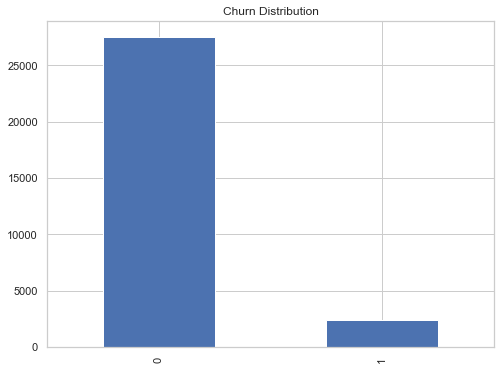

In [164]:
# First lets look at the distribution of churn column.

plt.figure(figsize=(8,6))
highValueData.churn.value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.show()

In [165]:
# Lets look at the churn distribution in terms of percentages.

round(100 * highValueData['churn'].value_counts() / highValueData.shape[0], 2)

# We can see a high imbalance in it.

0    91.86
1     8.14
Name: churn, dtype: float64

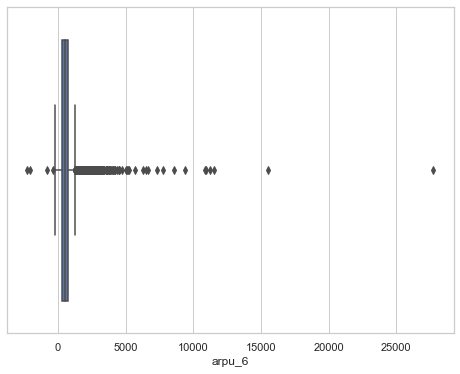

In [166]:
# Lets look at the ARPU data for the 3 months.

plt.figure(figsize=(8,6))
sns.boxplot(highValueData['arpu_6'])
plt.show()

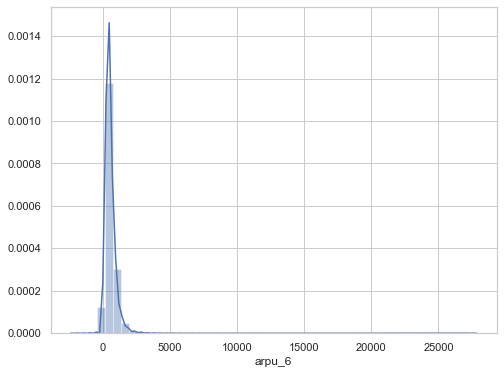

In [167]:
# Lets look at the ARPU data for the 3 months.

plt.figure(figsize=(8,6))
sns.distplot(highValueData['arpu_6'])
plt.show()

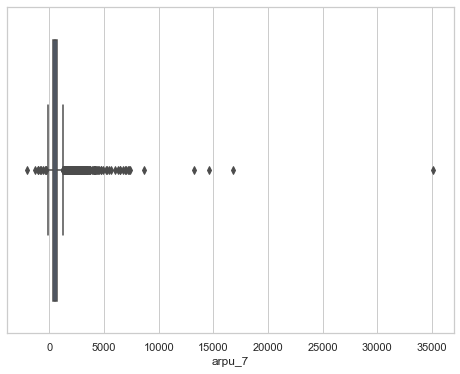

In [168]:
# Lets look at the ARPU data for the 3 months.

plt.figure(figsize=(8,6))
sns.boxplot(highValueData['arpu_7'])
plt.show()

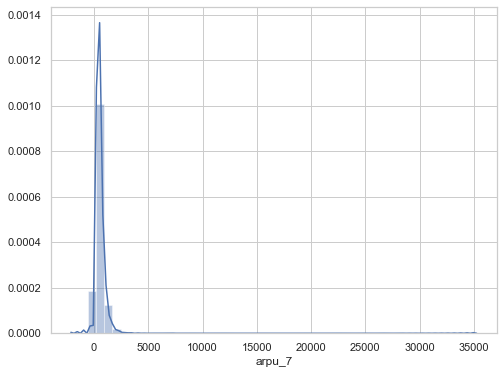

In [169]:
# Lets look at the ARPU data for the 3 months.

plt.figure(figsize=(8,6))
sns.distplot(highValueData['arpu_7'])
plt.show()

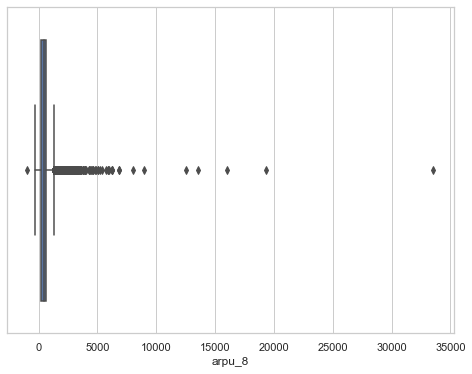

In [170]:
# Lets look at the ARPU data for the 3 months.

plt.figure(figsize=(8,6))
sns.boxplot(highValueData['arpu_8'])
plt.show()

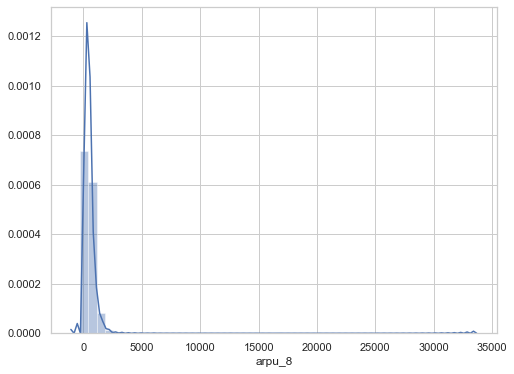

In [171]:
# Lets look at the ARPU data for the 3 months.

plt.figure(figsize=(8,6))
sns.distplot(highValueData['arpu_8'])
plt.show()

## Outlier Treatments

So as we can see from the univariate analysis that majority of the numerical data are skewed so we'll be capping the outlier values here.

In [172]:
# Printing the initial skew values of the numerical columns.

highValueData.skew(axis = 0, numeric_only = True)

arpu_6                 11.970653
arpu_7                 17.479168
arpu_8                 15.268867
onnet_mou_6             4.051300
onnet_mou_7             4.250689
onnet_mou_8             5.094557
offnet_mou_6            3.430289
offnet_mou_7            3.668628
offnet_mou_8            5.084969
roam_ic_mou_6          11.527679
roam_ic_mou_7          17.321817
roam_ic_mou_8          18.692708
roam_og_mou_6           9.468721
roam_og_mou_7           9.392546
roam_og_mou_8          14.573164
loc_og_t2t_mou_6        9.545624
loc_og_t2t_mou_7       10.569198
loc_og_t2t_mou_8       14.164942
loc_og_t2m_mou_6        4.377285
loc_og_t2m_mou_7        4.105791
loc_og_t2m_mou_8        4.132027
loc_og_t2f_mou_6       18.077125
loc_og_t2f_mou_7       16.694880
loc_og_t2f_mou_8       12.753430
loc_og_t2c_mou_6       12.867175
loc_og_t2c_mou_7       25.580170
loc_og_t2c_mou_8       16.681485
loc_og_mou_6            4.518472
loc_og_mou_7            4.414003
loc_og_mou_8            5.388228
std_og_t2t

In [173]:
# Making a list of all the numeric columns.

nonNumCols = ['mobile_number', 'churn']
numCols = [col for col in highValueData.columns if col not in nonNumCols]

In [174]:
# Creating a function to cap the outliers.
# We replace the outlier values with a higher limit and lower limit to reduce the skewness.

for col in numCols:
    highValueData[col].loc[(highValueData[col] > highValueData[col].quantile(0.90))] = highValueData[col].quantile(0.90)
    highValueData[col].loc[(highValueData[col] < highValueData[col].quantile(0.10))] = highValueData[col].quantile(0.10)

In [175]:
# Printing the skew values after treating the outliers.

highValueData.skew(axis = 0, numeric_only = True)

arpu_6                0.437530
arpu_7                0.454817
arpu_8                0.410159
onnet_mou_6           1.283763
onnet_mou_7           1.305718
onnet_mou_8           1.332111
offnet_mou_6          0.854515
offnet_mou_7          0.872630
offnet_mou_8          0.886743
roam_ic_mou_6         2.076981
roam_ic_mou_7         2.137076
roam_ic_mou_8         1.971271
roam_og_mou_6         2.082160
roam_og_mou_7         2.182353
roam_og_mou_8         2.093570
loc_og_t2t_mou_6      1.193931
loc_og_t2t_mou_7      1.211541
loc_og_t2t_mou_8      1.204227
loc_og_t2m_mou_6      0.994821
loc_og_t2m_mou_7      0.996230
loc_og_t2m_mou_8      0.995346
loc_og_t2f_mou_6      1.535339
loc_og_t2f_mou_7      1.519170
loc_og_t2f_mou_8      1.518923
loc_og_t2c_mou_6      1.895609
loc_og_t2c_mou_7      1.860858
loc_og_t2c_mou_8      1.836128
loc_og_mou_6          0.941467
loc_og_mou_7          0.926631
loc_og_mou_8          0.954052
std_og_t2t_mou_6      1.678193
std_og_t2t_mou_7      1.670653
std_og_t

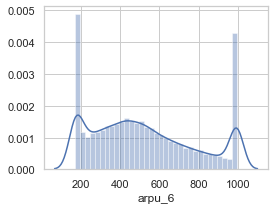

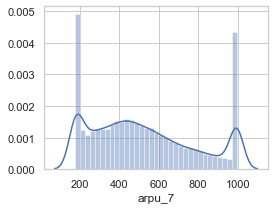

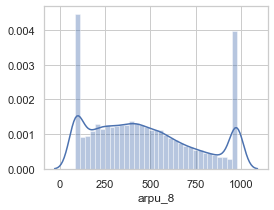

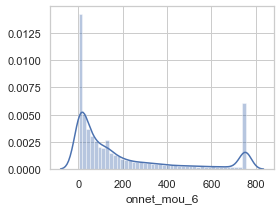

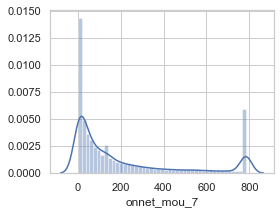

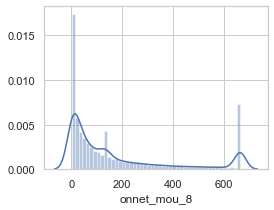

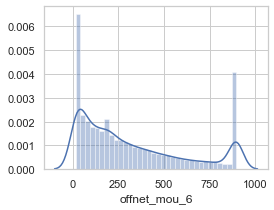

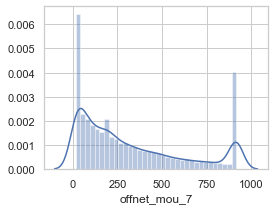

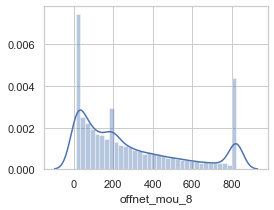

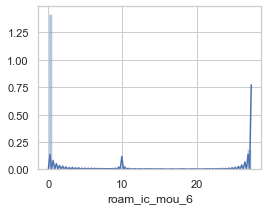

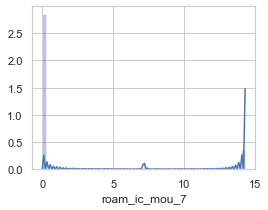

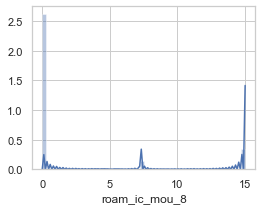

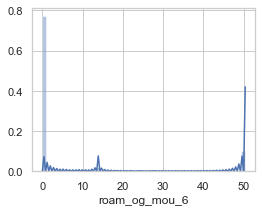

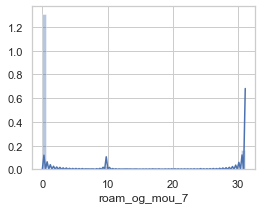

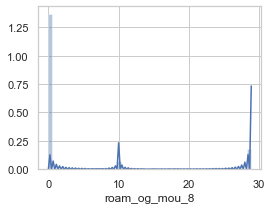

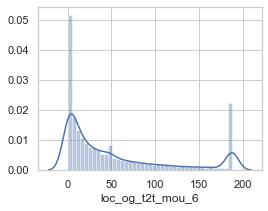

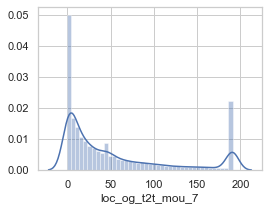

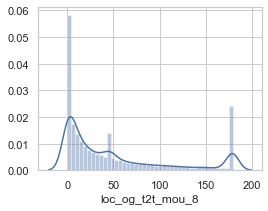

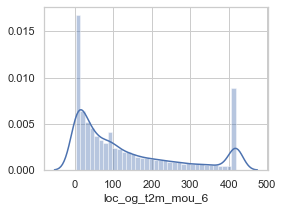

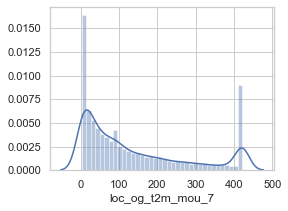

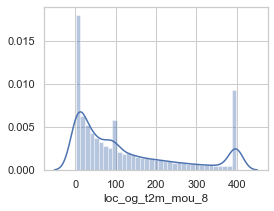

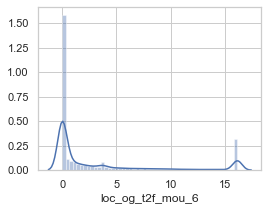

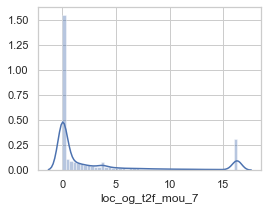

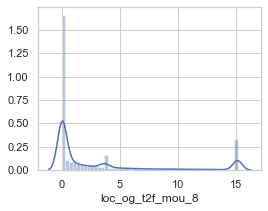

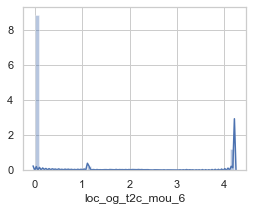

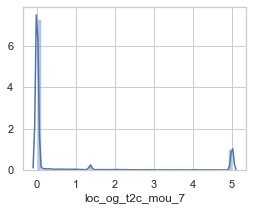

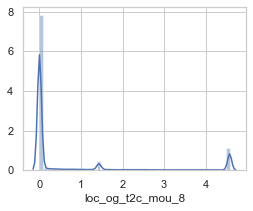

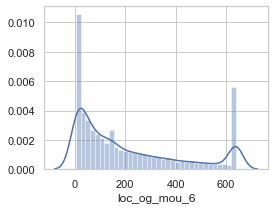

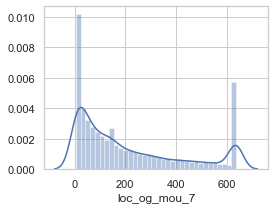

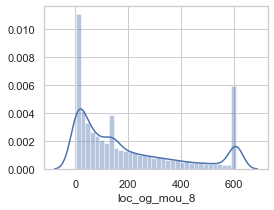

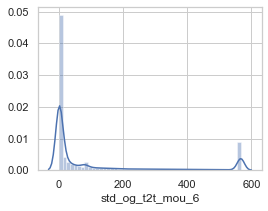

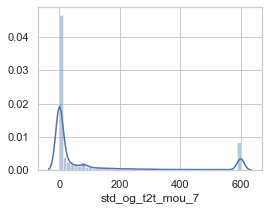

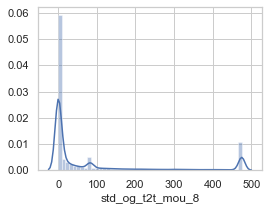

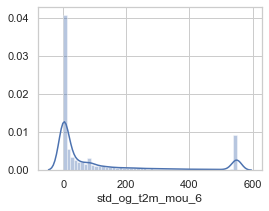

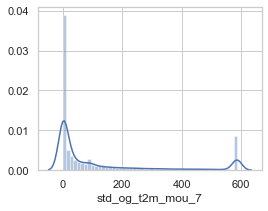

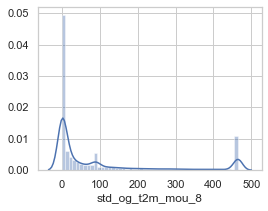

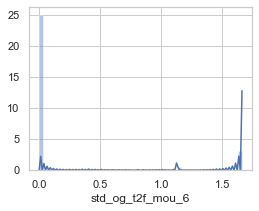

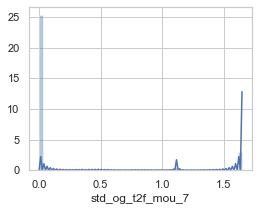

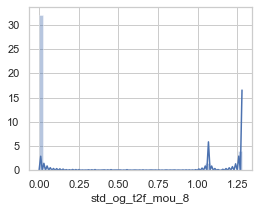

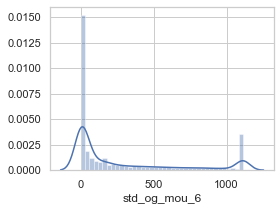

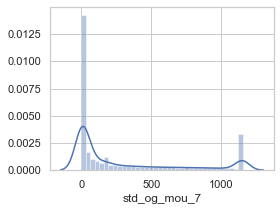

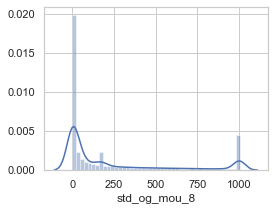

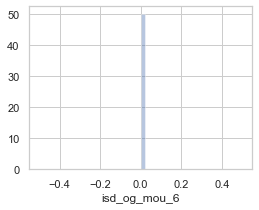

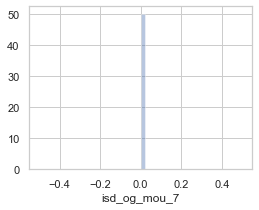

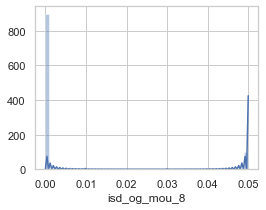

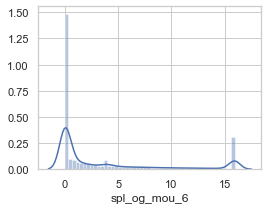

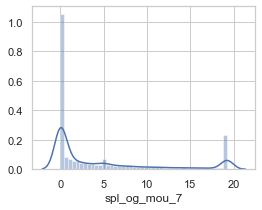

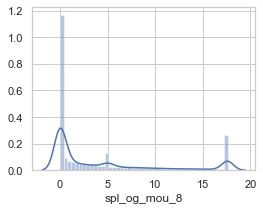

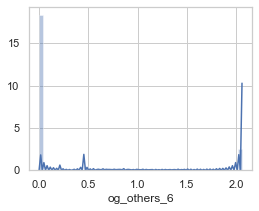

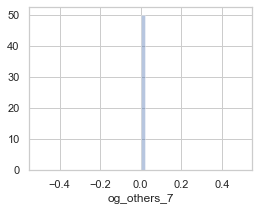

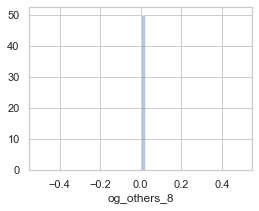

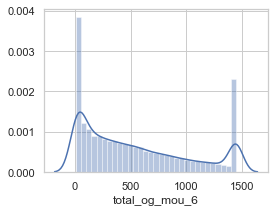

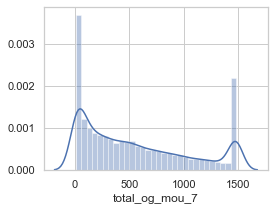

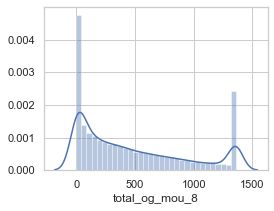

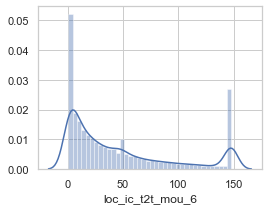

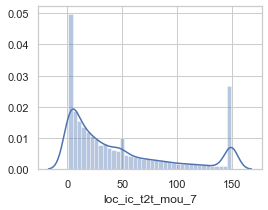

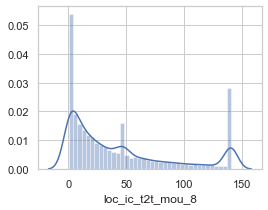

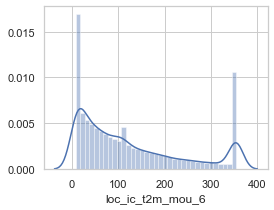

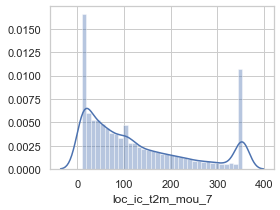

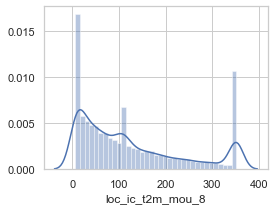

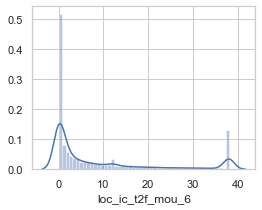

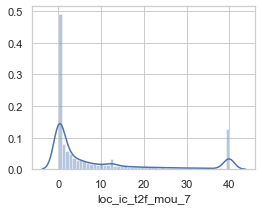

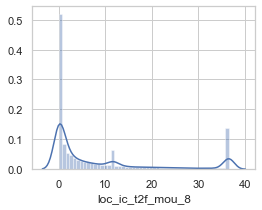

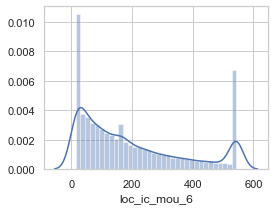

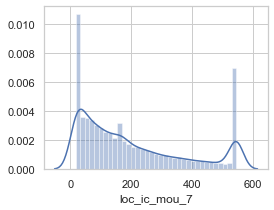

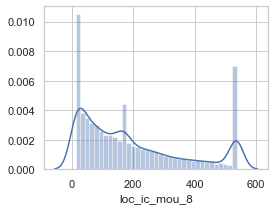

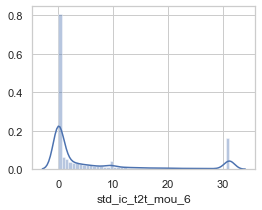

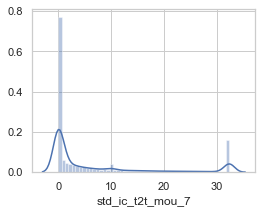

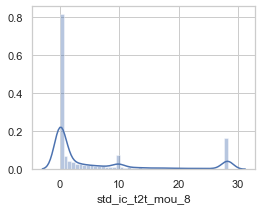

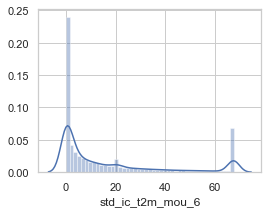

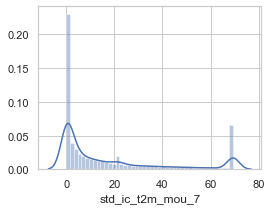

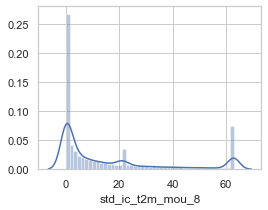

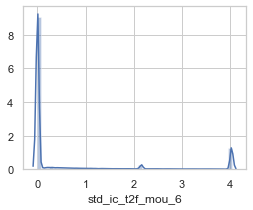

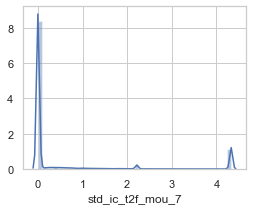

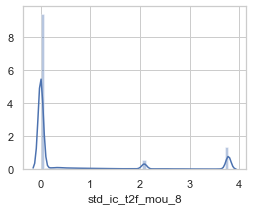

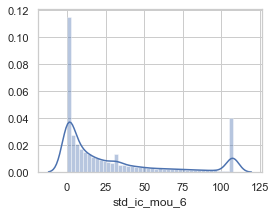

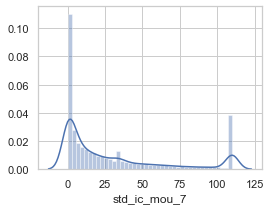

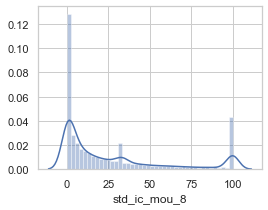

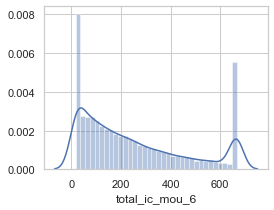

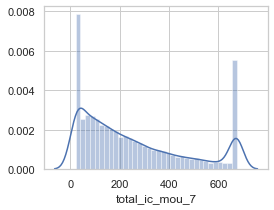

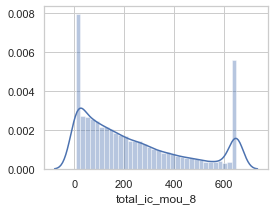

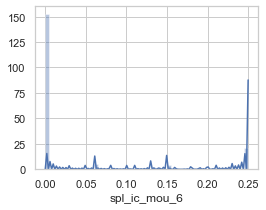

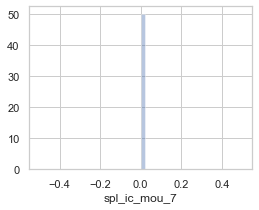

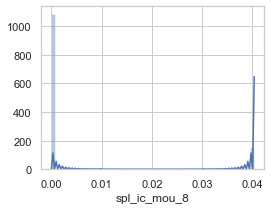

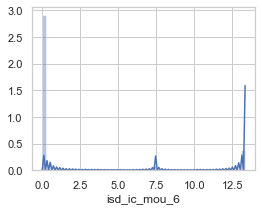

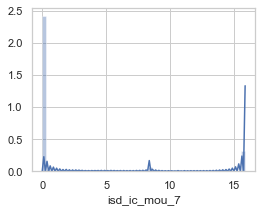

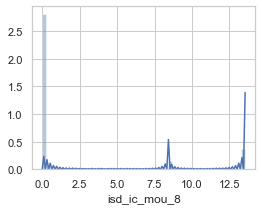

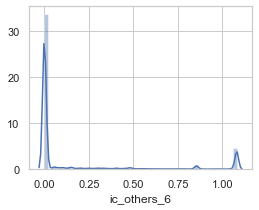

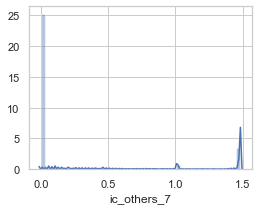

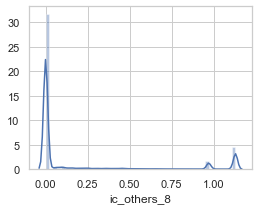

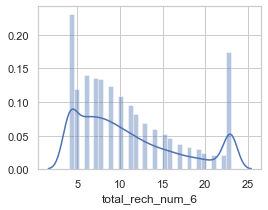

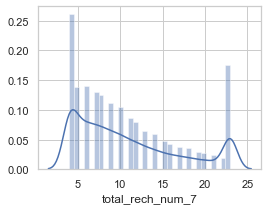

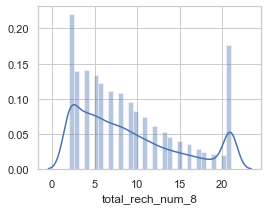

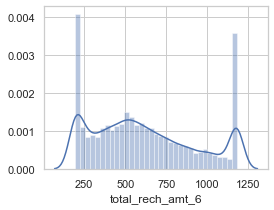

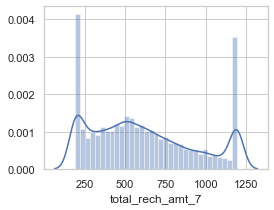

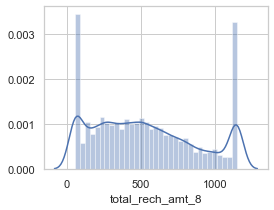

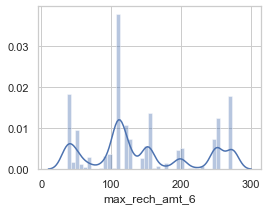

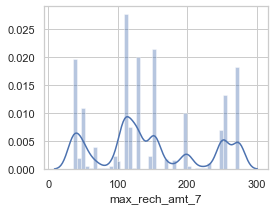

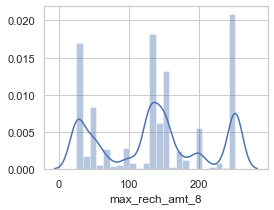

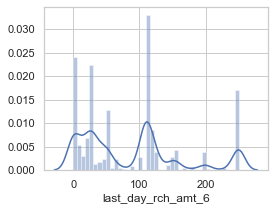

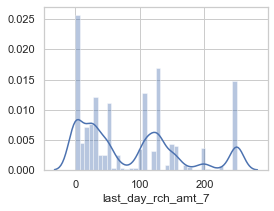

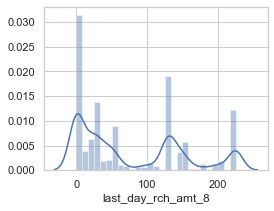

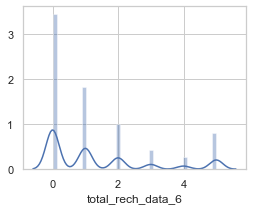

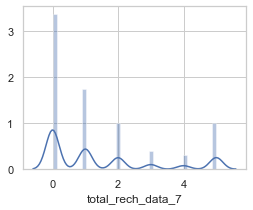

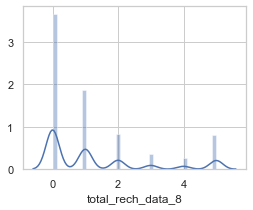

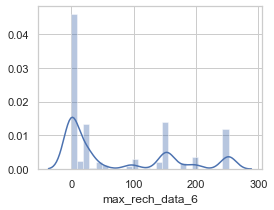

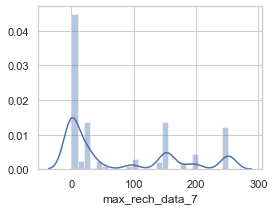

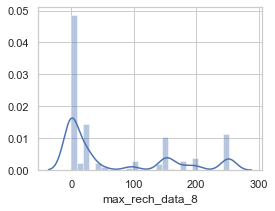

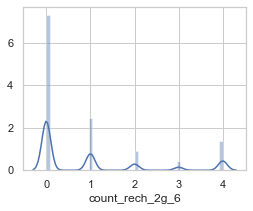

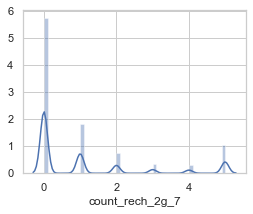

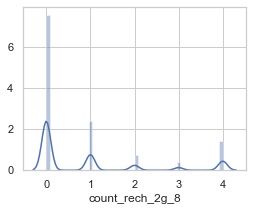

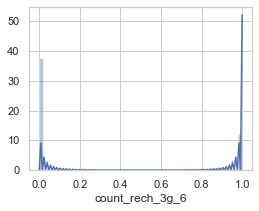

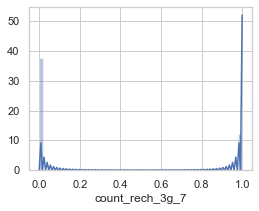

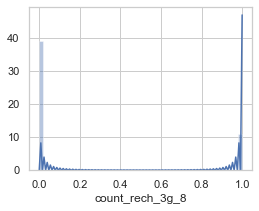

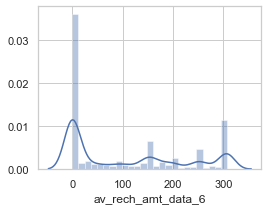

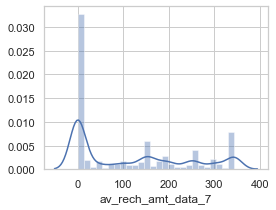

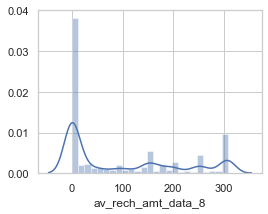

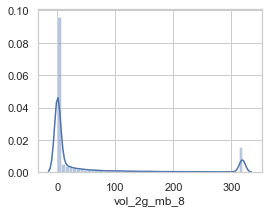

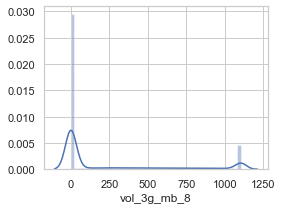

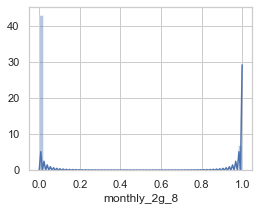

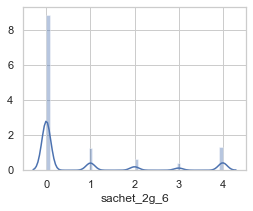

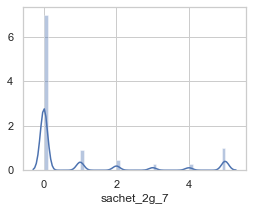

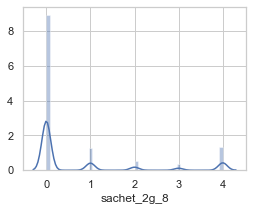

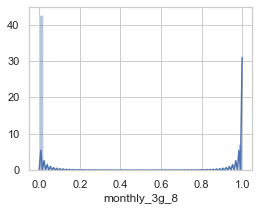

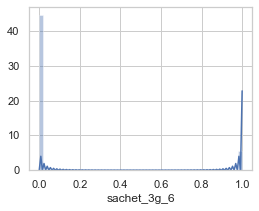

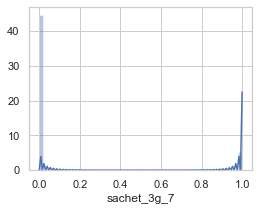

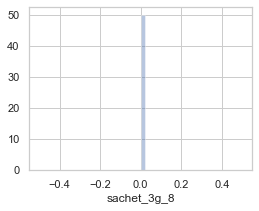

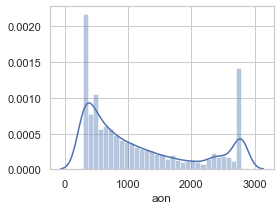

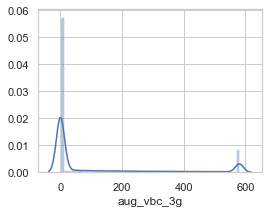

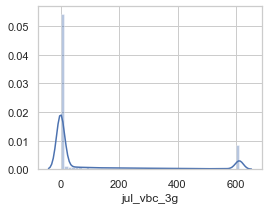

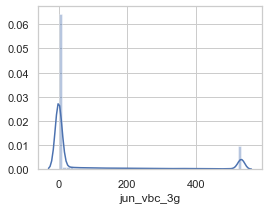

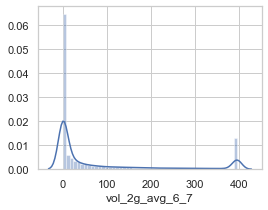

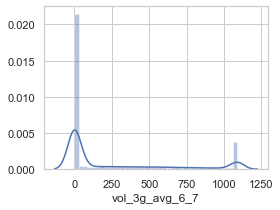

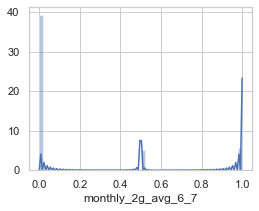

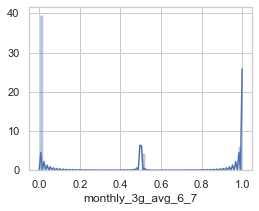

In [176]:
# Displaying the new plots for numeric columns.

for col in numCols:
    plt.figure(figsize=(4,3))
    sns.distplot(highValueData[col])
    plt.show()

## Model Building

### Data Preparation

In [177]:
# Putting feature variable to X.

X = highValueData.drop(['mobile_number', 'churn'], axis=1)

# Putting response variable to y.

y = highValueData['churn']

# Splitting the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

### PCA

In [178]:
# Apply pca to train data.

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [179]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [180]:
# Extract pca model from pipeline.

pca = pca.named_steps['pca']

# look at explainded variance of PCA components.

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       15.83
1       28.31
2       35.23
3       40.69
4       45.01
5       48.06
6       50.76
7       53.29
8       55.62
9       57.68
10      59.62
11      61.52
12      63.19
13      64.70
14      66.12
15      67.50
16      68.83
17      70.10
18      71.28
19      72.41
20      73.45
21      74.46
22      75.43
23      76.36
24      77.21
25      78.01
26      78.78
27      79.54
28      80.25
29      80.95
30      81.65
31      82.31
32      82.95
33      83.58
34      84.17
35      84.73
36      85.28
37      85.81
38      86.32
39      86.82
40      87.29
41      87.75
42      88.19
43      88.62
44      89.03
45      89.44
46      89.83
47      90.22
48      90.61
49      90.97
50      91.34
51      91.68
52      92.01
53      92.31
54      92.62
55      92.91
56      93.19
57      93.46
58      93.73
59      93.98
60      94.22
61      94.46
62      94.69
63      94.90
64      95.11
65      95.32
66      95.53
67      95.72
68      95.92
69      96.11
70      96.30
71    

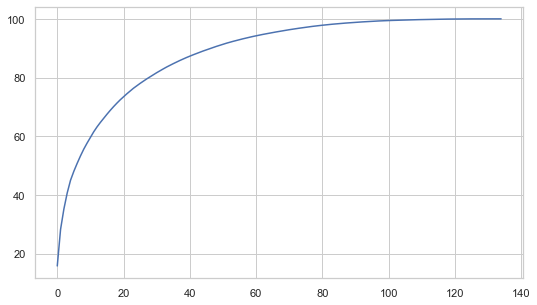

In [181]:
# Plot feature variance.

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.show()

#### PCA and Logistic Regression

In [182]:
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [183]:
pipeline.fit(X_train, y_train)

# Check score on train data.

pipeline.score(X_train, y_train)

0.8456666666666667

In [184]:
# PCA.
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function.

logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# Compile pipeline.

pca_logistic = Pipeline(steps)

# Hyperparameter space.

params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# Create 5 folds.

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# Create gridsearch object.

model_pca = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [185]:
model_pca.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [186]:
pd.DataFrame(model_pca.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.651187,1.920691,0.437068,0.195570,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.912403,0.902582,0.908242,0.900917,0.911964,0.907222,0.004726,25
1,2.210650,0.064187,0.037760,0.003861,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.913120,0.902918,0.909822,0.903141,0.915087,0.908818,0.005017,15
2,2.047353,0.136506,0.035613,0.005379,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.912299,0.902261,0.908797,0.901645,0.911526,0.907306,0.004527,20
3,2.510680,0.040118,0.045779,0.014155,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.913082,0.902604,0.908030,0.906043,0.916144,0.909180,0.004861,3
4,1.662741,0.040116,0.046293,0.009348,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.912242,0.902779,0.908478,0.901209,0.911445,0.907230,0.004483,24
5,2.327700,0.055125,0.044810,0.010706,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.913076,0.902992,0.908421,0.905630,0.916746,0.909373,0.004974,1
6,2.123866,0.041558,0.041659,0.003719,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.911785,0.902037,0.908980,0.901124,0.911678,0.907121,0.004643,30
7,2.998179,0.078657,0.061465,0.018630,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.912910,0.902143,0.907495,0.906134,0.915944,0.908925,0.004919,11
8,1.764498,0.049135,0.043288,0.002995,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.911850,0.902045,0.908726,0.901641,0.911435,0.907139,0.004458,28
9,2.252331,0.040602,0.047727,0.009252,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.912928,0.902434,0.908114,0.905822,0.916738,0.909207,0.005081,2


In [187]:
print("Best AUC: ", model_pca.best_score_)
print("Best hyperparameters: ", model_pca.best_params_)

Best AUC:  0.9093728329651641
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 80}


In [188]:
y_pred_pca = model_pca.predict(X_test)

# Create onfusion matrix.

confusion = confusion_matrix(y_test, y_pred_pca)
print(confusion)

y_pred_prob_pca = pipeline.predict_proba(X_test)[:, 1]

print("AUC:", round(roc_auc_score(y_test, y_pred_prob_pca),2))

[[7244 1007]
 [ 147  603]]
AUC: 0.91


In [189]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model.

print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity.

print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned.

print('false postive rate: ',FP/ float(TN+FP))

# Positive predictive value.

print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value.

print('Negative predictive value: ',TN / float(TN+ FN))

Sensitivity:  0.804
Specificity:  0.8779541873712278
false postive rate:  0.12204581262877227
positive predictive value:  0.37453416149068325
Negative predictive value:  0.9801109457448248


### Scaling the data

In [190]:
scaler = MinMaxScaler()
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,vol_2g_avg_6_7,vol_3g_avg_6_7,monthly_2g_avg_6_7,monthly_3g_avg_6_7
11785,1.000000,0.895399,0.569347,0.005223,0.008621,0.006067,0.153218,0.158699,0.108126,1.000000,1.0,1.0,0.121555,0.462528,0.341413,0.028681,0.038724,0.027063,0.045763,0.066310,0.047655,0.073776,0.000000,0.000000,0.0,1.0,0.240175,0.036381,0.051302,0.037594,0.000000,0.000000,0.000000,0.004748,0.018563,0.028523,0.000000,0.0,0.0,0.002341,0.009440,0.013222,0.0,0.0,1.0,0.000000,0.443925,0.062465,0.0,0.0,0.0,0.097959,0.097092,0.068288,0.098960,0.230811,0.325879,0.364134,0.382491,0.286752,0.188898,0.243866,0.059547,0.268505,0.318762,0.270641,0.000000,0.00000,0.0,0.258217,0.473949,0.914522,0.000000,0.000000,0.0,0.162474,0.299554,0.575715,0.641347,0.513348,0.404298,0.0,0.0,0.0,1.0,1.000000,1.000000,0.0,1.000000,0.000000,0.210526,0.052632,0.052632,1.000000,0.698603,0.551282,1.000000,1.000000,0.898678,1.00,0.140,0.888889,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
11987,0.415509,0.163472,0.313570,0.190231,0.061703,0.060066,0.345865,0.234954,0.313819,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.343000,0.160239,0.227634,0.659319,0.421747,0.529863,0.752635,0.317986,1.000000,0.0,1.0,0.000000,0.550203,0.332519,0.470253,0.141837,0.032135,0.000000,0.057373,0.033392,0.041494,0.000000,1.0,0.0,0.100448,0.039564,0.019235,0.0,0.0,0.0,0.000000,0.857217,0.000000,0.0,0.0,0.0,0.316977,0.181771,0.225044,0.181472,0.138029,0.258360,0.392113,0.566907,0.682030,1.000000,1.000000,0.375034,0.469656,0.502801,0.534658,0.500801,0.43321,0.0,0.430560,0.417242,0.353988,1.000000,0.900693,0.0,0.747065,0.426726,0.222845,0.593999,0.491644,0.488261,0.0,0.0,0.0,1.0,0.677806,0.416236,1.0,0.932432,0.159292,0.210526,0.157895,0.157895,0.386410,0.200599,0.395604,0.308017,0.352941,0.462555,0.44,0.392,0.577778,0.4,0.6,0.2,0.388889,0.388889,0.388889,0.50,0.6,0.25,0.0,0.0,0.0,0.636364,0.430233,0.318182,1.000000,0.154981,0.0,0.50,0.6,0.25,0.0,0.0,0.0,0.0,0.82

### Building the logistic regression model for extracting important features.

In [191]:
# Adding constant and creating a Logistic regression model using all the columns.

classWeight = {0: 0.10, 1: 0.90}
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial(), weights = classWeight)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20870
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3374.4
Date:                Mon, 06 Jul 2020   Deviance:                       6748.8
Time:                        01:54:44   Pearson chi2:                 4.06e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4832      0.136    -10.891      0.000      -1.750      -1.216
arpu_6                 0.4035      0.337      1.198      0.231      -0.257       1.064
arpu_7                 1.0577      0.329      3.216      0.001       0.413       1.702
arpu_8                -0.0359      0.366     -0.098      0.922      -0.753       0.682
onnet_mou_6            0.2343      0.395      0.593      0.553      -0.541       1.009
onnet_mou_7            0.7722      0.481      1.606      0.108      -0.170       1.714
onnet_mou_8           -0.9159      0.503     -1.821      0.069      -1.902       0.070
offnet_mou_6           0.7258      0.382      1.898      0.058      -0.024       1.475
offnet_mou_7           1.0719      0.428      2.502      0.012       0.232       1.912
offnet_mou_8          -1.1517      0.435     -2.650      0.008      -2.003      -0.300
roam_ic_mou_6          0.3281      0.223      1.469      0.142      -0.110       0.766
roam_ic_mou_7         -0.0613      0.189     -0.324      0.746      -0.432       0.309
roam_ic_mou_8          0.2547      0.165      1.544      0.122      -0.069       0.578
roam_og_mou_6         -0.2850      0.217     -1.316      0.188      -0.710       0.139
roam_og_mou_7          0.0899      0.181      0.497      0.619      -0.265       0.444
roam_og_mou_8          1.1747      0.159      7.392      0.000       0.863       1.486
loc_og_t2t_mou_6       0.2975      0.340      0.874      0.382      -0.370       0.965
loc_og_t2t_mou_7       0.3937      0.382      1.030      0.303      -0.356       1.143
loc_og_t2t_mou_8      -1.0948      0.442     -2.475      0.013      -1.962      -0.228
loc_og_t2m_mou_6      -0.2021      0.539     -0.375      0.708      -1.259       0.855
loc_og_t2m_mou_7      -0.1177      0.622     -0.189      0.850      -1.337       1.102
loc_og_t2m_mou_8      -1.6591      0.691     -2.402      0.016      -3.013      -0.305
loc_og_t2f_mou_6      -0.1443      0.183     -0.789      0.430      -0.503       0.214
loc_og_t2f_mou_7       0.1814      0.197      0.919      0.358      -0.206       0.568
loc_og_t2f_mou_8      -0.2233      0.224     -0.995      0.320      -0.663       0.216
loc_og_t2c_mou_6      -0.1051      0.127     -0.826      0.409      -0.355       0.144
loc_og_t2c_mou_7      -0.0333      0.128     -0.259      0.795      -0.285       0.218
loc_og_t2c_mou_8       0.0553      0.145      0.380      0.704      -0.229       0.340
loc_og_mou_6          -0.4134      0.709     -0.583      0.560      -1.803       0.976
loc_og_mou_7          -0.9945      0.816     -1.219      0.223      -2.594       0.605
loc_og_mou_8           4.3333      0.932      4.651      0.000       2.507       6.160
std_og_t2t_mou_6       0.0451      0.389      0.116      0.908      -0.718       0.808
std_og_t2t_mou_7      -0.5525      0.4

In [192]:
# Applying RFE and selecting first 20 variables.

logreg = LogisticRegression(class_weight = classWeight)

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [193]:
# Columns selected by RFE for Modelling.

col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'count_rech_2g_6',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_6',
       'aon', 'vol_2g_avg_6_7'],
      dtype='object')

In [194]:
# Adding constants and creating a model with the columns selected by RFE.

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3502.4
Date:                Mon, 06 Jul 2020   Deviance:                       7004.8
Time:                        01:56:01   Pearson chi2:                 4.76e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4531      0.087    -16.711      0.000      -1.624      -1.283
arpu_7                 1.1479      0.136      8.429      0.000       0.881       1.415
roam_og_mou_8          1.3691      0.084     16.381      0.000       1.205       1.533
loc_og_t2m_mou_8      -0.0730      0.300     -0.243      0.808      -0.661       0.515
std_og_mou_8           2.3777      0.436      5.455      0.000       1.523       3.232
isd_og_mou_8           1.2693      0.107     11.863      0.000       1.060       1.479
total_og_mou_8        -3.5917      0.547     -6.571      0.000      -4.663      -2.520
loc_ic_t2m_mou_8      -0.7832      0.447     -1.750      0.080      -1.660       0.094
loc_ic_mou_6           0.8691      0.146      5.949      0.000       0.583       1.155
loc_ic_mou_8           1.2146      0.531      2.286      0.022       0.173       2.256
total_ic_mou_8        -3.0353      0.381     -7.961      0.000      -3.783      -2.288
total_rech_num_7       0.5655      0.142      3.996      0.000       0.288       0.843
total_rech_num_8      -1.8287      0.182    -10.043      0.000      -2.186      -1.472
last_day_rch_amt_8    -1.5781      0.130    -12.140      0.000      -1.833      -1.323
count_rech_2g_6       -1.0482      0.422     -2.482      0.013      -1.876      -0.220
av_rech_amt_data_8    -1.1566      0.254     -4.549      0.000      -1.655      -0.658
vol_2g_mb_8           -1.4699      0.221     -6.637      0.000      -1.904      -1.036
vol_3g_mb_8           -0.8308      0.259     -3.212      0.001      -1.338      -0.324
sachet_2g_6            1.0924      0.409      2.670      0.008       0.290       1.894
aon                   -0.7131      0.117     -6.121      0.000      -0.941      -0.485
vol_2g_avg_6_7         0.5586      0.131      4.251      0.000       0.301       0.816
======================================================================================
"""

In [195]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,27.83
13,count_rech_2g_6,17.41
5,total_og_mou_8,16.61
6,loc_ic_t2m_mou_8,16.05
17,sachet_2g_6,14.78
9,total_ic_mou_8,13.27
3,std_og_mou_8,8.15
2,loc_og_t2m_mou_8,6.87
11,total_rech_num_8,6.70
14,av_rech_amt_data_8,6.48


Now using manual feature elimination we will be eliinating features in the following way:
1. Feature with high p-value and high VIF
2. Feature with high p-value and low VIF
3. Feature with low p-value and high VIF

We will be keeping features with p-value < 0.05 and VIF < 5.

First we eliminate features with high P-value and high VIF.

In [196]:
col = col.drop('loc_og_t2m_mou_8')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3502.4
Date:                Mon, 06 Jul 2020   Deviance:                       7004.8
Time:                        01:56:02   Pearson chi2:                 4.80e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4547      0.087    -16.776      0.000      -1.625      -1.285
arpu_7                 1.1487      0.136      8.438      0.000       0.882       1.416
roam_og_mou_8          1.3672      0.083     16.436      0.000       1.204       1.530
std_og_mou_8           2.4423      0.347      7.046      0.000       1.763       3.122
isd_og_mou_8           1.2617      0.103     12.307      0.000       1.061       1.463
total_og_mou_8        -3.6774      0.420     -8.758      0.000      -4.500      -2.854
loc_ic_t2m_mou_8      -0.8195      0.422     -1.941      0.052      -1.647       0.008
loc_ic_mou_6           0.8705      0.146      5.962      0.000       0.584       1.157
loc_ic_mou_8           1.1973      0.526      2.275      0.023       0.166       2.229
total_ic_mou_8        -3.0048      0.359     -8.362      0.000      -3.709      -2.301
total_rech_num_7       0.5664      0.141      4.004      0.000       0.289       0.844
total_rech_num_8      -1.8271      0.182    -10.043      0.000      -2.184      -1.471
last_day_rch_amt_8    -1.5782      0.130    -12.142      0.000      -1.833      -1.323
count_rech_2g_6       -1.0463      0.422     -2.477      0.013      -1.874      -0.218
av_rech_amt_data_8    -1.1595      0.254     -4.565      0.000      -1.657      -0.662
vol_2g_mb_8           -1.4680      0.221     -6.633      0.000      -1.902      -1.034
vol_3g_mb_8           -0.8288      0.259     -3.206      0.001      -1.335      -0.322
sachet_2g_6            1.0909      0.409      2.666      0.008       0.289       1.893
aon                   -0.7135      0.116     -6.125      0.000      -0.942      -0.485
vol_2g_avg_6_7         0.5588      0.131      4.252      0.000       0.301       0.816
======================================================================================
"""

In [197]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,27.76
12,count_rech_2g_6,17.41
16,sachet_2g_6,14.77
5,loc_ic_t2m_mou_8,13.61
8,total_ic_mou_8,13.14
4,total_og_mou_8,11.02
10,total_rech_num_8,6.68
13,av_rech_amt_data_8,6.48
9,total_rech_num_7,6.13
0,arpu_7,5.92


In [198]:
col = col.drop('loc_ic_t2m_mou_8')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3504.2
Date:                Mon, 06 Jul 2020   Deviance:                       7008.4
Time:                        01:56:03   Pearson chi2:                 4.80e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4624      0.087    -16.878      0.000      -1.632      -1.293
arpu_7                 1.1528      0.136      8.466      0.000       0.886       1.420
roam_og_mou_8          1.3708      0.083     16.484      0.000       1.208       1.534
std_og_mou_8           2.4636      0.347      7.103      0.000       1.784       3.143
isd_og_mou_8           1.2573      0.103     12.263      0.000       1.056       1.458
total_og_mou_8        -3.7007      0.421     -8.800      0.000      -4.525      -2.877
loc_ic_mou_6           0.8701      0.146      5.960      0.000       0.584       1.156
loc_ic_mou_8           0.4191      0.350      1.197      0.231      -0.267       1.105
total_ic_mou_8        -2.9908      0.359     -8.338      0.000      -3.694      -2.288
total_rech_num_7       0.5616      0.141      3.972      0.000       0.284       0.839
total_rech_num_8      -1.8351      0.182    -10.092      0.000      -2.192      -1.479
last_day_rch_amt_8    -1.5767      0.130    -12.130      0.000      -1.831      -1.322
count_rech_2g_6       -1.0511      0.423     -2.487      0.013      -1.879      -0.223
av_rech_amt_data_8    -1.1605      0.254     -4.568      0.000      -1.658      -0.663
vol_2g_mb_8           -1.4670      0.221     -6.632      0.000      -1.901      -1.033
vol_3g_mb_8           -0.8292      0.259     -3.207      0.001      -1.336      -0.322
sachet_2g_6            1.0957      0.409      2.676      0.007       0.293       1.898
aon                   -0.7148      0.116     -6.138      0.000      -0.943      -0.487
vol_2g_avg_6_7         0.5583      0.131      4.248      0.000       0.301       0.816
======================================================================================
"""

In [199]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,count_rech_2g_6,17.40
6,loc_ic_mou_8,15.89
15,sachet_2g_6,14.77
7,total_ic_mou_8,13.14
4,total_og_mou_8,11.02
9,total_rech_num_8,6.68
12,av_rech_amt_data_8,6.47
8,total_rech_num_7,6.13
0,arpu_7,5.92
2,std_og_mou_8,5.61


In [200]:
col = col.drop('loc_ic_mou_8')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20982
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3504.9
Date:                Mon, 06 Jul 2020   Deviance:                       7009.9
Time:                        01:56:05   Pearson chi2:                 5.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4556      0.086    -16.863      0.000      -1.625      -1.286
arpu_7                 1.1316      0.135      8.394      0.000       0.867       1.396
roam_og_mou_8          1.3681      0.083     16.467      0.000       1.205       1.531
std_og_mou_8           2.5087      0.346      7.249      0.000       1.830       3.187
isd_og_mou_8           1.3196      0.087     15.085      0.000       1.148       1.491
total_og_mou_8        -3.7485      0.420     -8.922      0.000      -4.572      -2.925
loc_ic_mou_6           0.9228      0.139      6.640      0.000       0.650       1.195
total_ic_mou_8        -2.6750      0.235    -11.386      0.000      -3.135      -2.215
total_rech_num_7       0.5649      0.141      4.002      0.000       0.288       0.841
total_rech_num_8      -1.8438      0.182    -10.152      0.000      -2.200      -1.488
last_day_rch_amt_8    -1.5827      0.130    -12.187      0.000      -1.837      -1.328
count_rech_2g_6       -1.0503      0.422     -2.490      0.013      -1.877      -0.223
av_rech_amt_data_8    -1.1529      0.254     -4.545      0.000      -1.650      -0.656
vol_2g_mb_8           -1.4768      0.221     -6.682      0.000      -1.910      -1.044
vol_3g_mb_8           -0.8223      0.258     -3.186      0.001      -1.328      -0.316
sachet_2g_6            1.0930      0.409      2.675      0.007       0.292       1.894
aon                   -0.7131      0.116     -6.128      0.000      -0.941      -0.485
vol_2g_avg_6_7         0.5619      0.131      4.283      0.000       0.305       0.819
======================================================================================
"""

In [201]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,count_rech_2g_6,17.40
14,sachet_2g_6,14.77
4,total_og_mou_8,10.77
8,total_rech_num_8,6.68
11,av_rech_amt_data_8,6.47
7,total_rech_num_7,6.12
0,arpu_7,5.90
2,std_og_mou_8,5.40
6,total_ic_mou_8,5.32
5,loc_ic_mou_6,4.36


In [202]:
col = col.drop('count_rech_2g_6')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20983
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3508.2
Date:                Mon, 06 Jul 2020   Deviance:                       7016.3
Time:                        01:56:06   Pearson chi2:                 5.32e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4899      0.085    -17.477      0.000      -1.657      -1.323
arpu_7                 1.1549      0.135      8.581      0.000       0.891       1.419
roam_og_mou_8          1.3704      0.083     16.504      0.000       1.208       1.533
std_og_mou_8           2.5306      0.347      7.296      0.000       1.851       3.210
isd_og_mou_8           1.3218      0.087     15.107      0.000       1.150       1.493
total_og_mou_8        -3.7613      0.421     -8.934      0.000      -4.586      -2.936
loc_ic_mou_6           0.9125      0.139      6.569      0.000       0.640       1.185
total_ic_mou_8        -2.6811      0.235    -11.396      0.000      -3.142      -2.220
total_rech_num_7       0.5894      0.141      4.185      0.000       0.313       0.865
total_rech_num_8      -1.8522      0.182    -10.190      0.000      -2.208      -1.496
last_day_rch_amt_8    -1.5817      0.130    -12.171      0.000      -1.836      -1.327
av_rech_amt_data_8    -1.1460      0.253     -4.530      0.000      -1.642      -0.650
vol_2g_mb_8           -1.4739      0.221     -6.681      0.000      -1.906      -1.042
vol_3g_mb_8           -0.8606      0.256     -3.356      0.001      -1.363      -0.358
sachet_2g_6            0.1192      0.113      1.055      0.292      -0.102       0.341
aon                   -0.7156      0.116     -6.153      0.000      -0.944      -0.488
vol_2g_avg_6_7         0.4509      0.123      3.653      0.000       0.209       0.693
======================================================================================
"""

In [203]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,10.77
8,total_rech_num_8,6.68
10,av_rech_amt_data_8,6.47
7,total_rech_num_7,6.12
0,arpu_7,5.88
2,std_og_mou_8,5.40
6,total_ic_mou_8,5.32
5,loc_ic_mou_6,4.34
12,vol_3g_mb_8,3.91
11,vol_2g_mb_8,3.06


As we can see we have no features with high P-value, so we eliminate features with high VIF and low P-value.

In [204]:
col = col.drop('sachet_2g_6')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3508.7
Date:                Mon, 06 Jul 2020   Deviance:                       7017.4
Time:                        01:56:06   Pearson chi2:                 5.30e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4699      0.083    -17.688      0.000      -1.633      -1.307
arpu_7                 1.1173      0.130      8.614      0.000       0.863       1.372
roam_og_mou_8          1.3677      0.083     16.482      0.000       1.205       1.530
std_og_mou_8           2.5190      0.346      7.272      0.000       1.840       3.198
isd_og_mou_8           1.3241      0.087     15.142      0.000       1.153       1.495
total_og_mou_8        -3.7571      0.421     -8.929      0.000      -4.582      -2.932
loc_ic_mou_6           0.9151      0.139      6.590      0.000       0.643       1.187
total_ic_mou_8        -2.6832      0.235    -11.406      0.000      -3.144      -2.222
total_rech_num_7       0.6121      0.139      4.397      0.000       0.339       0.885
total_rech_num_8      -1.8420      0.181    -10.157      0.000      -2.197      -1.487
last_day_rch_amt_8    -1.5861      0.130    -12.218      0.000      -1.841      -1.332
av_rech_amt_data_8    -1.1327      0.253     -4.482      0.000      -1.628      -0.637
vol_2g_mb_8           -1.4770      0.221     -6.698      0.000      -1.909      -1.045
vol_3g_mb_8           -0.8723      0.256     -3.404      0.001      -1.375      -0.370
aon                   -0.7171      0.116     -6.170      0.000      -0.945      -0.489
vol_2g_avg_6_7         0.4928      0.117      4.227      0.000       0.264       0.721
======================================================================================
"""

In [205]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,10.77
8,total_rech_num_8,6.62
10,av_rech_amt_data_8,6.36
7,total_rech_num_7,5.85
0,arpu_7,5.58
2,std_og_mou_8,5.40
6,total_ic_mou_8,5.32
5,loc_ic_mou_6,4.33
12,vol_3g_mb_8,3.90
11,vol_2g_mb_8,3.05


In [206]:
col = col.drop('total_og_mou_8')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3558.3
Date:                Mon, 06 Jul 2020   Deviance:                       7116.5
Time:                        01:56:07   Pearson chi2:                 3.88e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4192      0.082    -17.346      0.000      -1.580      -1.259
arpu_7                 0.7844      0.124      6.305      0.000       0.541       1.028
roam_og_mou_8          1.5277      0.081     18.897      0.000       1.369       1.686
std_og_mou_8          -0.2740      0.131     -2.095      0.036      -0.530      -0.018
isd_og_mou_8           1.5851      0.079     19.981      0.000       1.430       1.741
loc_ic_mou_6           0.9273      0.139      6.652      0.000       0.654       1.201
total_ic_mou_8        -3.8875      0.215    -18.106      0.000      -4.308      -3.467
total_rech_num_7       0.8317      0.137      6.068      0.000       0.563       1.100
total_rech_num_8      -2.3110      0.176    -13.108      0.000      -2.657      -1.965
last_day_rch_amt_8    -1.7833      0.127    -13.992      0.000      -2.033      -1.534
av_rech_amt_data_8    -1.0824      0.250     -4.334      0.000      -1.572      -0.593
vol_2g_mb_8           -1.4691      0.220     -6.679      0.000      -1.900      -1.038
vol_3g_mb_8           -0.7726      0.252     -3.065      0.002      -1.267      -0.279
aon                   -0.7921      0.115     -6.905      0.000      -1.017      -0.567
vol_2g_avg_6_7         0.5382      0.116      4.630      0.000       0.310       0.766
======================================================================================
"""

In [207]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,av_rech_amt_data_8,6.32
7,total_rech_num_8,6.06
6,total_rech_num_7,5.61
5,total_ic_mou_8,4.91
0,arpu_7,4.90
4,loc_ic_mou_6,4.29
11,vol_3g_mb_8,3.89
10,vol_2g_mb_8,3.05
8,last_day_rch_amt_8,2.52
13,vol_2g_avg_6_7,2.35


In [208]:
col = col.drop('av_rech_amt_data_8')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3568.2
Date:                Mon, 06 Jul 2020   Deviance:                       7136.3
Time:                        01:56:08   Pearson chi2:                 4.26e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4575      0.081    -17.922      0.000      -1.617      -1.298
arpu_7                 0.8128      0.124      6.557      0.000       0.570       1.056
roam_og_mou_8          1.5285      0.081     18.902      0.000       1.370       1.687
std_og_mou_8          -0.2373      0.131     -1.816      0.069      -0.494       0.019
isd_og_mou_8           1.5689      0.079     19.860      0.000       1.414       1.724
loc_ic_mou_6           0.9159      0.139      6.582      0.000       0.643       1.189
total_ic_mou_8        -3.8993      0.215    -18.150      0.000      -4.320      -3.478
total_rech_num_7       0.8755      0.137      6.406      0.000       0.608       1.143
total_rech_num_8      -2.4008      0.176    -13.679      0.000      -2.745      -2.057
last_day_rch_amt_8    -1.8269      0.126    -14.479      0.000      -2.074      -1.580
vol_2g_mb_8           -2.0056      0.188    -10.657      0.000      -2.374      -1.637
vol_3g_mb_8           -1.6815      0.154    -10.946      0.000      -1.983      -1.380
aon                   -0.7866      0.114     -6.878      0.000      -1.011      -0.562
vol_2g_avg_6_7         0.5627      0.116      4.845      0.000       0.335       0.790
======================================================================================
"""

In [209]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_num_8,5.91
6,total_rech_num_7,5.60
5,total_ic_mou_8,4.91
0,arpu_7,4.89
4,loc_ic_mou_6,4.28
8,last_day_rch_amt_8,2.46
9,vol_2g_mb_8,2.35
12,vol_2g_avg_6_7,2.34
2,std_og_mou_8,2.31
11,aon,2.08


In [210]:
col = col.drop('std_og_mou_8')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3569.8
Date:                Mon, 06 Jul 2020   Deviance:                       7139.6
Time:                        01:56:08   Pearson chi2:                 4.34e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.4867      0.080    -18.606      0.000      -1.643      -1.330
arpu_7                 0.7570      0.120      6.292      0.000       0.521       0.993
roam_og_mou_8          1.5430      0.080     19.202      0.000       1.386       1.701
isd_og_mou_8           1.5543      0.079     19.712      0.000       1.400       1.709
loc_ic_mou_6           0.9617      0.137      7.013      0.000       0.693       1.230
total_ic_mou_8        -3.9139      0.215    -18.195      0.000      -4.336      -3.492
total_rech_num_7       0.9124      0.135      6.744      0.000       0.647       1.178
total_rech_num_8      -2.5338      0.161    -15.776      0.000      -2.849      -2.219
last_day_rch_amt_8    -1.8476      0.126    -14.707      0.000      -2.094      -1.601
vol_2g_mb_8           -1.9765      0.187    -10.543      0.000      -2.344      -1.609
vol_3g_mb_8           -1.6422      0.152    -10.792      0.000      -1.940      -1.344
aon                   -0.7659      0.114     -6.724      0.000      -0.989      -0.543
vol_2g_avg_6_7         0.5823      0.116      5.028      0.000       0.355       0.809
======================================================================================
"""

In [211]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_num_7,5.55
6,total_rech_num_8,5.19
4,total_ic_mou_8,4.90
0,arpu_7,4.26
3,loc_ic_mou_6,4.07
7,last_day_rch_amt_8,2.40
11,vol_2g_avg_6_7,2.34
8,vol_2g_mb_8,2.33
10,aon,2.08
9,vol_3g_mb_8,1.38


In [212]:
col = col.drop('total_rech_num_7')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3592.6
Date:                Mon, 06 Jul 2020   Deviance:                       7185.2
Time:                        01:56:09   Pearson chi2:                 4.56e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3421      0.076    -17.629      0.000      -1.491      -1.193
arpu_7                 1.0890      0.109      9.961      0.000       0.875       1.303
roam_og_mou_8          1.4879      0.079     18.750      0.000       1.332       1.643
isd_og_mou_8           1.4902      0.078     19.153      0.000       1.338       1.643
loc_ic_mou_6           1.0252      0.137      7.499      0.000       0.757       1.293
total_ic_mou_8        -4.1628      0.214    -19.473      0.000      -4.582      -3.744
total_rech_num_8      -1.9923      0.138    -14.448      0.000      -2.263      -1.722
last_day_rch_amt_8    -1.9848      0.123    -16.134      0.000      -2.226      -1.744
vol_2g_mb_8           -2.0238      0.187    -10.840      0.000      -2.390      -1.658
vol_3g_mb_8           -1.7335      0.152    -11.438      0.000      -2.031      -1.436
aon                   -0.8498      0.113     -7.514      0.000      -1.071      -0.628
vol_2g_avg_6_7         0.6367      0.115      5.549      0.000       0.412       0.862
======================================================================================
"""

In [213]:
# Check for the VIF values of the feature variables.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_ic_mou_8,4.81
3,loc_ic_mou_6,4.03
0,arpu_7,3.55
5,total_rech_num_8,2.42
6,last_day_rch_amt_8,2.34
7,vol_2g_mb_8,2.33
10,vol_2g_avg_6_7,2.31
9,aon,2.08
8,vol_3g_mb_8,1.38
1,roam_og_mou_8,1.24


#### Making Predictions

In [214]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

# Creating a dataframe with the probabilities.

y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Probability':y_train_pred})

# Creating a dataframe with the predicted conversion value and the lead score as '100 * probability'.

y_train_pred_final['predicted'] = y_train_pred_final.Probability.map(lambda x: 1 if x > 0.5 else 0)

#### Model Evaluation

In [215]:
# Confusion matrix.

confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
print(confusion)

[[19028   281]
 [ 1026   665]]


In [216]:
# Plotting the ROC Curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [217]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.Probability, drop_intermediate = False )

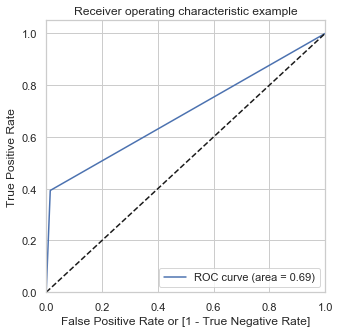

In [218]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.predicted)

#### Finding Optimal Cut-off Point

In [219]:
# Let's create columns with different probability cutoffs.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.076186,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000872,0,1,0,0,0,0,0,0,0,0,0
2,0,0.034698,0,1,0,0,0,0,0,0,0,0,0
3,0,0.002105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.008166,0,1,0,0,0,0,0,0,0,0,0


In [220]:
# Now let's calculate precision recall and f1-score for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','precision','recall','f1-score'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    precision = metrics.precision_score(y_train_pred_final.churn, y_train_pred_final[i])
    recall = metrics.recall_score(y_train_pred_final.churn, y_train_pred_final[i])
    f1score = metrics.f1_score(y_train_pred_final.churn, y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,precision,recall,f1score]
print(cutoff_df)

     prob  precision    recall  f1-score
0.0   0.0   0.080524  1.000000  0.149046
0.1   0.1   0.342779  0.815494  0.482674
0.2   0.2   0.469240  0.690124  0.558640
0.3   0.3   0.569081  0.552927  0.560888
0.4   0.4   0.630542  0.454169  0.528017
0.5   0.5   0.702960  0.393258  0.504361
0.6   0.6   0.762901  0.323477  0.454319
0.7   0.7   0.823266  0.217623  0.344247
0.8   0.8   0.873494  0.085748  0.156166
0.9   0.9   0.941176  0.009462  0.018735


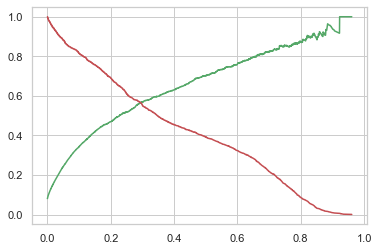

In [221]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the precision-recall curve above, 0.3 is the optimum point to take it as a cutoff probability as it gives a good trade-off between precision, recall and the f1-score.

In [222]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,churn,Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.076186,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000872,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.034698,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.008166,0,1,0,0,0,0,0,0,0,0,0,0


In [223]:
confusion_final = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
print(confusion_final, '\n')

print(classification_report(y_train_pred_final.churn, y_train_pred_final.final_predicted))

[[18601   708]
 [  756   935]] 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19309
           1       0.57      0.55      0.56      1691

    accuracy                           0.93     21000
   macro avg       0.77      0.76      0.76     21000
weighted avg       0.93      0.93      0.93     21000



In [224]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model.

print('Precision of the Model is :',TP / float(TP+FP))

# Let us calculate specificity.

print('Recall of the Model is :',TP / float(TP+FN))

# Let's see the sensitivity of our logistic regression model.

print('F1 - Score of the Model is :',metrics.f1_score(y_train_pred_final.churn, y_train_pred_final.final_predicted))

# Positive predictive value.

print('Positive predictive value of the Model is :',TP / float(TP+FP))

# Negative predictive value.

print('Negative predictive value of the Model is :',TN / float(TN+ FN))

Precision of the Model is : 0.5690809494826536
Recall of the Model is : 0.5529272619751626
F1 - Score of the Model is : 0.5608878224355128
Positive predictive value of the Model is : 0.5690809494826536
Negative predictive value of the Model is : 0.9609443612129979


#### Making predictions on the test set

In [225]:
X_test[numCols] = scaler.transform(X_test[numCols])

X_test = X_test[col]
X_test.head()

,arpu_7,roam_og_mou_8,isd_og_mou_8,loc_ic_mou_6,total_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,aon,vol_2g_avg_6_7
6102,0.439732,0.000000,0.0,0.101964,0.068418,0.105263,0.640000,0.000000,0.0,0.152650,0.000000
2539,0.037060,0.175208,0.0,0.021488,0.027687,0.263158,0.000000,0.547515,0.0,0.178159,0.589563
21576,0.664956,0.000000,0.0,0.840653,0.704308,0.315789,0.577778,0.000000,0.0,0.000000,0.002544
19574,0.377779,0.000000,0.0,0.535026,0.283052,1.000000,0.133333,0.000000,0.0,0.369868,0.000000
12804,0.274900,1.000000,0.0,0.525132,0.040063,0.000000,0.000000,0.000000,0.0,0.510163,0.336966


In [226]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

In [227]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Customer Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side. 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,churn,Customer Number,0
0,1,6102,0.065795
1,1,2539,0.072922
2,0,21576,0.011405
3,0,19574,0.015803
4,1,12804,0.645162


In [228]:
# Renaming the column.

y_pred_final= y_pred_final.rename(columns={ 0 : 'Probability'})

y_pred_final = y_pred_final.reindex(['Customer Number','churn','Probability'], axis=1)

y_pred_final['final_predicted'] = y_pred_final.Probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head(10)

,Customer Number,churn,Probability,final_predicted
0,6102,1,0.065795,0
1,2539,1,0.072922,0
2,21576,0,0.011405,0
3,19574,0,0.015803,0
4,12804,1,0.645162,1
5,24030,0,0.001772,0
6,20273,0,0.012770,0
7,7538,0,0.003578,0
8,3196,0,0.020996,0
9,12935,0,0.049428,0


In [229]:
# Confusion Matrix and classification report.

confusion_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
print(confusion_test, '\n')

print(classification_report(y_pred_final.churn, y_pred_final.final_predicted))

[[7949  302]
 [ 330  420]] 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8251
           1       0.58      0.56      0.57       750

    accuracy                           0.93      9001
   macro avg       0.77      0.76      0.77      9001
weighted avg       0.93      0.93      0.93      9001



In [230]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Let's see the precision of our logistic regression model.

print('Precision of the Model is:',TP / float(TP+FP))

# Let's see the recall of our logistic regression model.

print('Recall of the Model is:',TP / float(TP+FN))

# Let's see the recall of our logistic regression model.

print('F1 - Score of the model is:', metrics.f1_score(y_pred_final.churn, y_pred_final.final_predicted))

# Printing the ROC-AUC score.

print('ROC-AUC score is: ', "{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.final_predicted)))

Precision of the Model is: 0.5817174515235457
Recall of the Model is: 0.56
F1 - Score of the model is: 0.5706521739130436
ROC-AUC score is:  0.76


In [231]:
# Printing the features that immpact the model along with their coefficients value.

res.params

const                -1.342089
arpu_7                1.089039
roam_og_mou_8         1.487933
isd_og_mou_8          1.490218
loc_ic_mou_6          1.025217
total_ic_mou_8       -4.162787
total_rech_num_8     -1.992262
last_day_rch_amt_8   -1.984771
vol_2g_mb_8          -2.023807
vol_3g_mb_8          -1.733525
aon                  -0.849752
vol_2g_avg_6_7        0.636659
dtype: float64

As we can see the positive and the negative coefficients, we can conclude depending on our model that:

1. The major features that impact the customers to churn or not churn are from the 8th month i.e. the Action Phase.
2. The company can focus more on giving good roaming and ISD offers or packages to customers.
3. Also the age of the customer on the network, i.e. the period the customer has been with the company affects the company inversely, so the company should come up with different offers to hold back the old and faithful customers who have been with the company for a long time.
4. Also good Data packages and offers will help hold the customer back.
5. Overall we can say if we see a decrease in the usage of different aspects like ISD, Roaming, Data, etc. in the 'Action Phase' than the 'Good Phase', we can interpret that the customer is likely to churn and offer the customer with different packages to keep the customer in the network.